# Python Data Science Handbook

## 5. Machine Learning

### Data Representation in Scikit-Learn

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### The Target Array

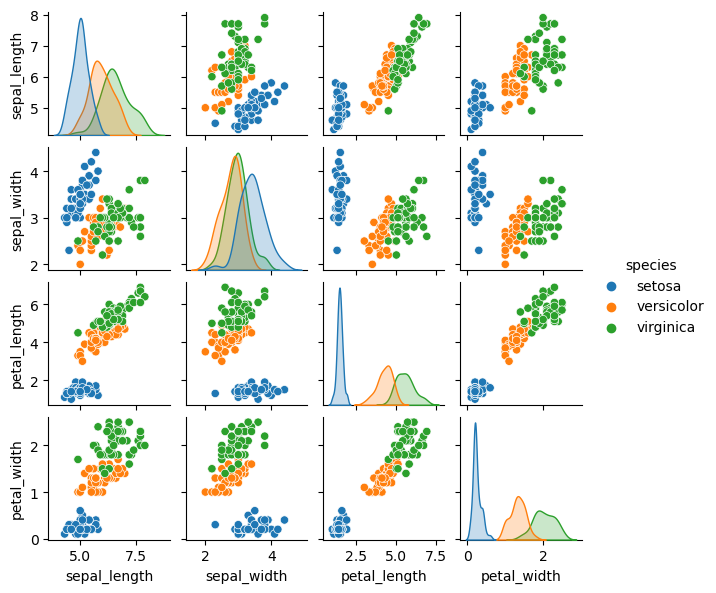

In [2]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue = 'species', height = 1.5);

In [5]:
X_iris = iris.drop('species', axis=  1)
X_iris.shape

(150, 4)

In [8]:
y_iris = iris['species']
y_iris.shape

(150,)

In [12]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

### Supervised Learning Example: Simple Linear Regression

In [13]:
import matplotlib.pyplot as plt
import numpy as np

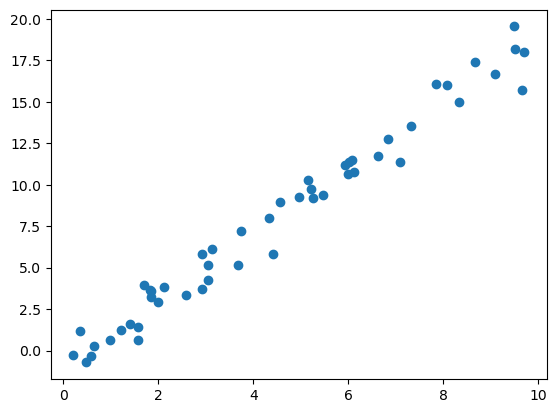

In [14]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Choose a class of model

In [15]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters

In [16]:
model = LinearRegression(fit_intercept = True)
model

LinearRegression()

#### 3. Arrange data into a features matrix and target vector

In [17]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to the data

In [20]:
model.fit(X, y)

LinearRegression()

In [23]:
model.coef_   # slope

array([1.9776566])

In [24]:
model.intercept_   # intercept

-0.9033107255311164

#### 5. Predict labels for unknown data

In [26]:
xfit = np.linspace(-1, 11)

In [27]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

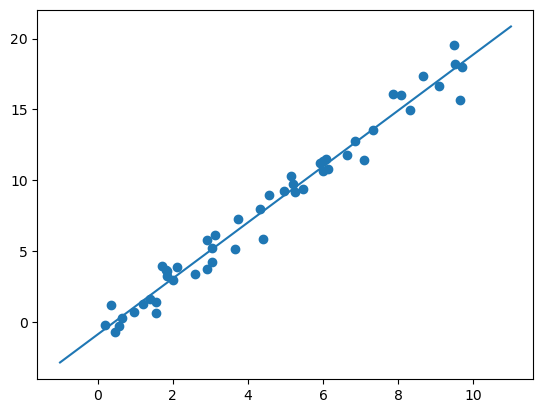

In [28]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Supervised Learning Example: Iris Classification

In [32]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state = 1)

In [33]:
from sklearn.naive_bayes import GaussianNB   # 1. Choose model class
model = GaussianNB()                         # 2. Instantiate model
model.fit(Xtrain, ytrain)                    # 3. Fit model to data
y_model = model.predict(Xtest)               # 4. Predict on new data

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised Learning Example: Iris Dimensionality

In [35]:
from sklearn.decomposition import PCA   # 1. Choose model class
model = PCA(n_components = 2)           # 2. Instantiate model
model.fit(X_iris)                       # 3. Fit model to data
X_2D = model.transform(X_iris)          # 4. Transform the data

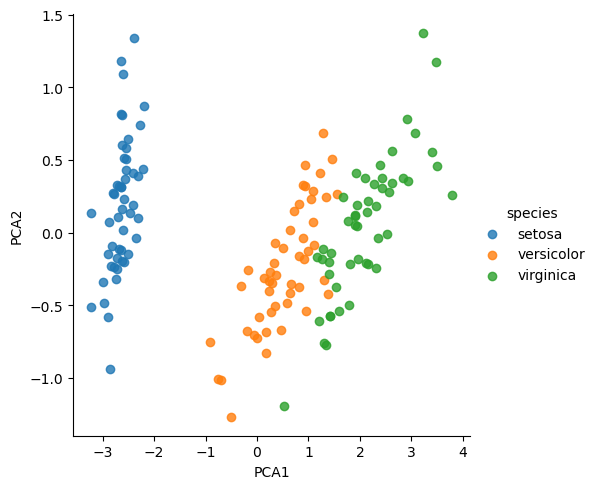

In [37]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x = 'PCA1', y = 'PCA2', hue = 'species', 
           data = iris, fit_reg = False);

#### Unsupervised Learning Example: Iris Clustering

In [38]:
from sklearn.mixture import GaussianMixture         # 1. Choose model class
model = GaussianMixture(n_components = 3,
                        covariance_type = 'full')   # 2. Instantiate model
model.fit(X_iris)                                   # 3. Fit model to data
y_gmm = model.predict(X_iris)                       # 4. Determine labels

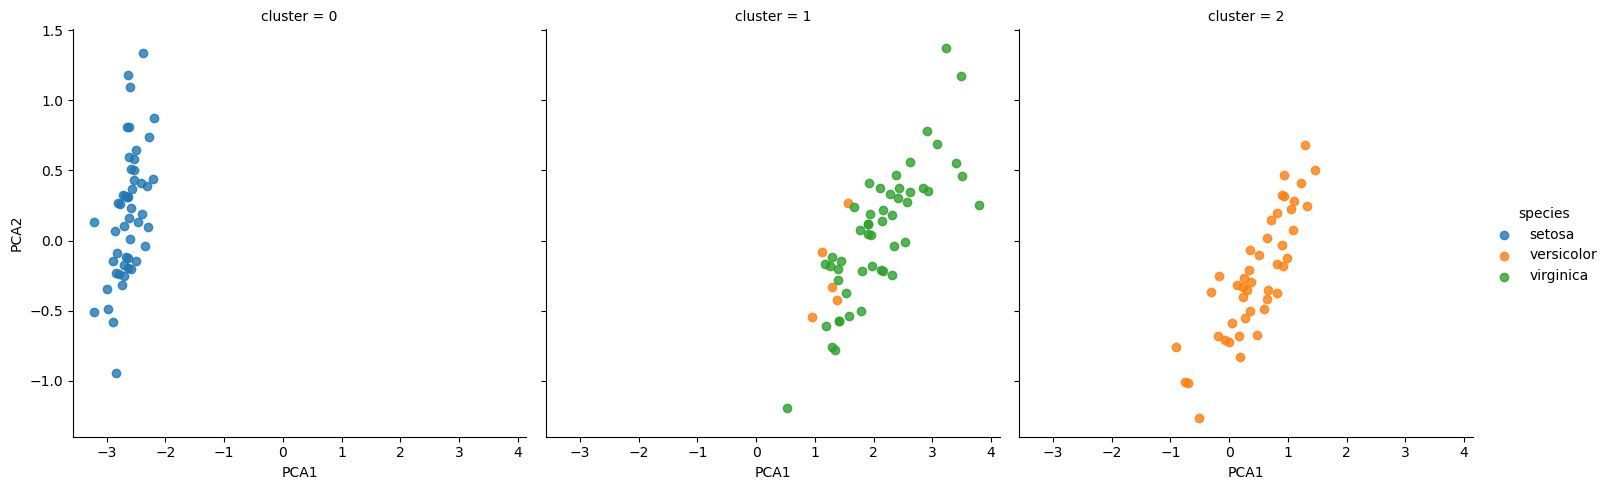

In [47]:
iris['cluster'] = y_gmm
sns.lmplot(x = 'PCA1', y = 'PCA2', data = iris, hue = 'species', 
           col = 'cluster', fit_reg = False);

### Application: Exploring Handwritten Digits. Loading and Visualizing the Digits Data

In [49]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

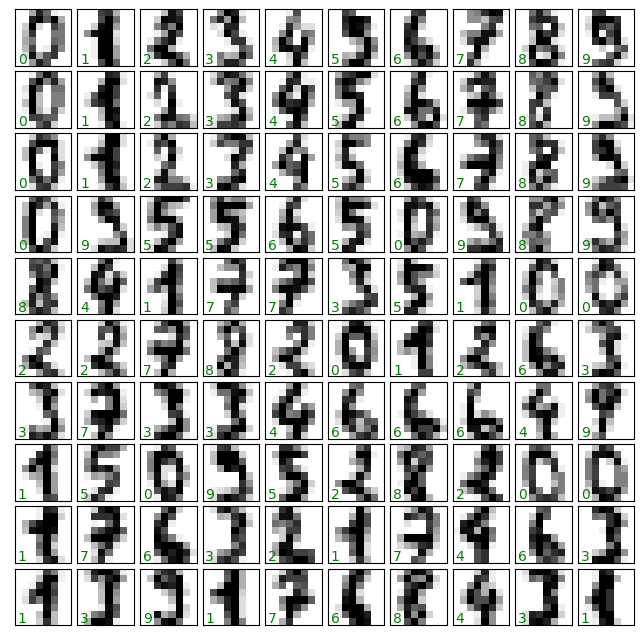

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform = ax.transAxes, color = 'green')

In [51]:
X = digits.data
X.shape

(1797, 64)

In [52]:
y = digits.target
y.shape

(1797,)

### Unsupervised Learning Example: Dimensionality Reduction

In [54]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


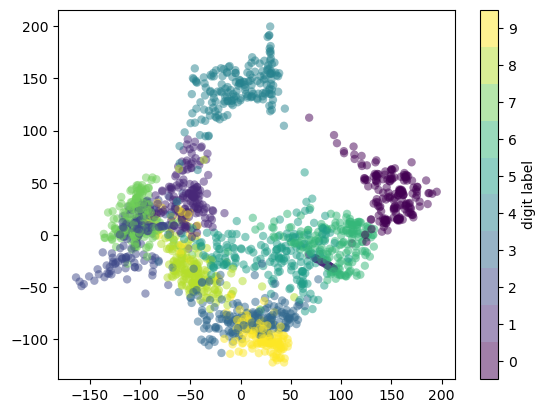

In [55]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target,
            edgecolor = 'none', alpha = 0.5,
            cmap = plt.cm.get_cmap('viridis', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5);

### Classification on Digits

In [56]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [58]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

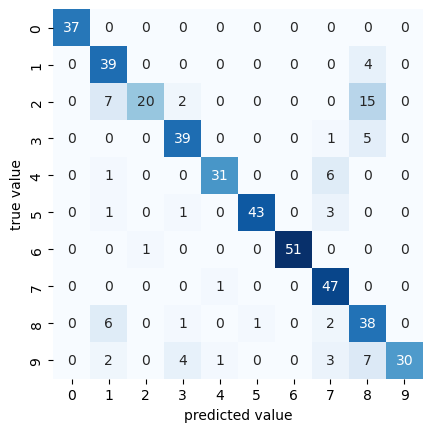

In [60]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square = True, annot = True, cbar = False, cmap = 'Blues')

plt.xlabel('predicted value')
plt.ylabel('true value');

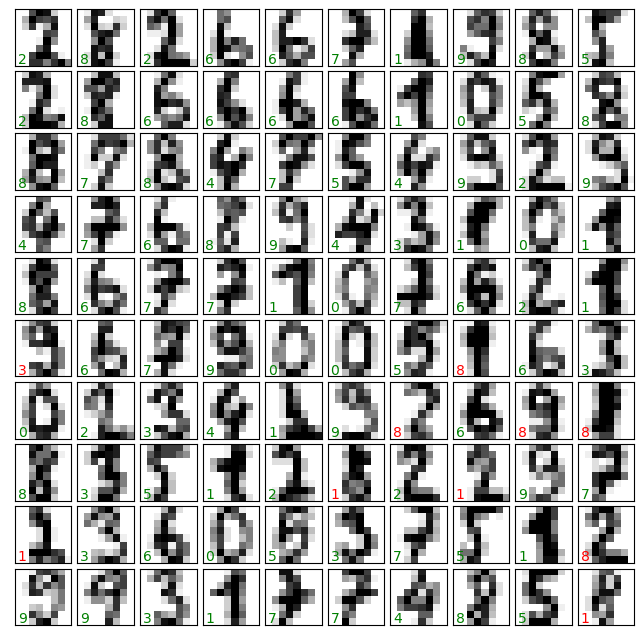

In [61]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform = ax.transAxes,
            color = 'green' if (ytest[i] == y_model[i]) else 'red')

### Hyperparameters and Model Validation

### Model Validation the Wrong Way

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [7]:
model.fit(X, y)
y_model = model.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

### Model Validation the Right Way: Holdout Sets

In [9]:
from sklearn.model_selection import train_test_split

# Split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, 
                                  train_size = 0.5)

# Fit the model on one set of data
model.fit(X1, y1)

# Evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9066666666666666

### Model Validation via Cross-Validation

In [10]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

(0.96, 0.9066666666666666)

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv = 5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [12]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv = LeaveOneOut())
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
scores.mean()

0.96

### Validation Curves in Scikit-Learn

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [24]:
import numpy as np

def make_data(N, err = 1.0, rseed = 1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

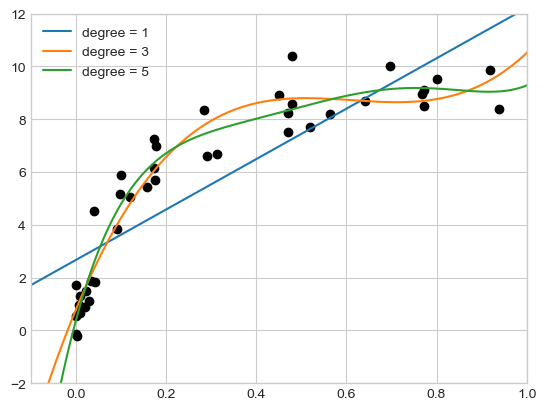

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree = {0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best');

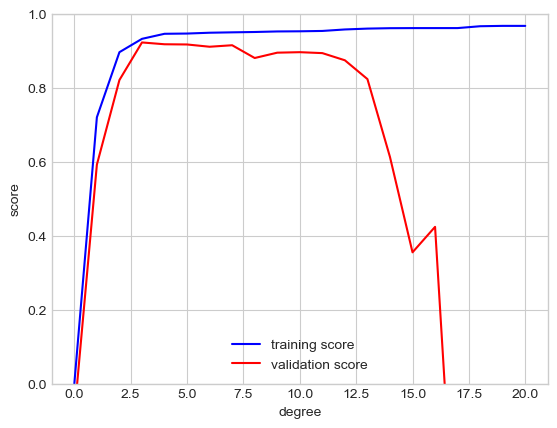

In [27]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)

train_score, val_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name = 'polynomialfeatures__degree',
    param_range = degree, cv = 7)

plt.plot(degree, np.median(train_score, 1),
         color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1),
         color = 'red', label = 'validation score')

plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

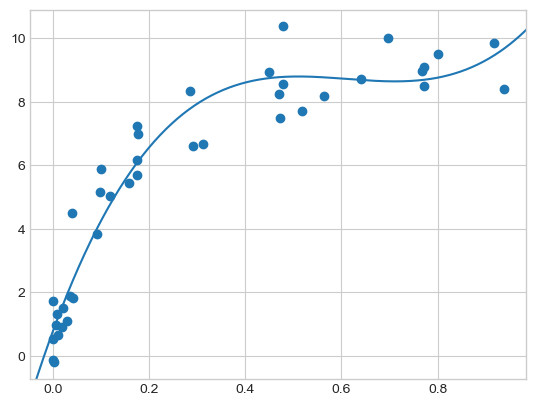

In [29]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Learning Curves

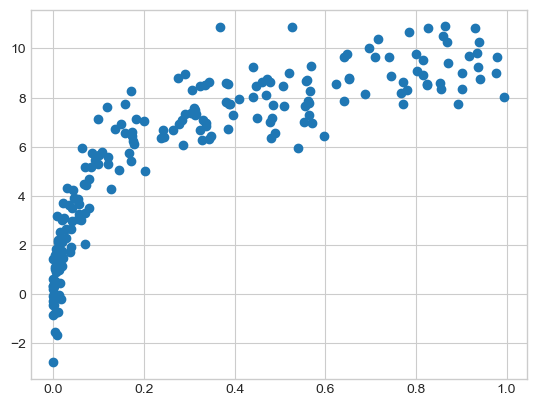

In [39]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

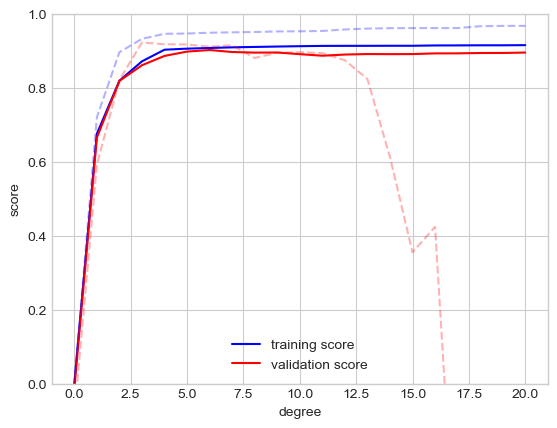

In [41]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(
    PolynomialRegression(), X2, y2,
    param_name = 'polynomialfeatures__degree',
    param_range = degree, cv = 7)

plt.plot(degree, np.median(train_score2, 1),
         color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score2, 1),
         color = 'red', label = 'validation score')
plt.plot(degree, np.median(train_score, 1),
         color = 'blue', alpha = 0.3, linestyle = 'dashed')
plt.plot(degree, np.median(val_score, 1),
         color = 'red', alpha = 0.3, linestyle = 'dashed')

plt.legend(loc = 'lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

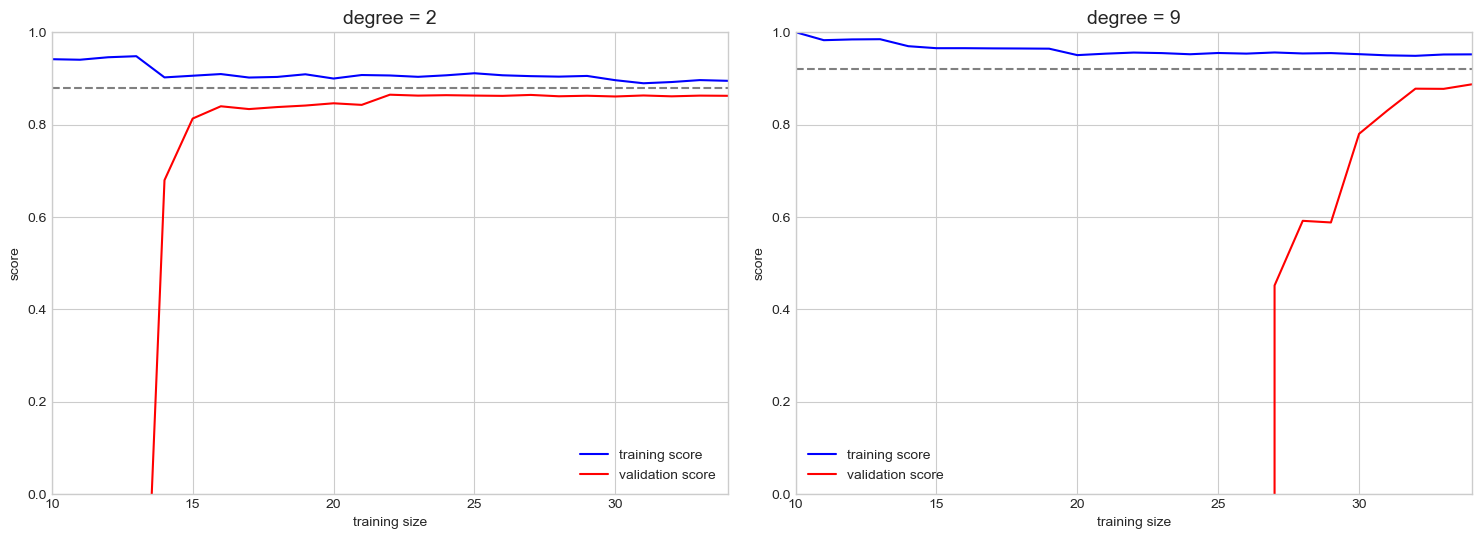

In [48]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(
        PolynomialRegression(degree), X, y, cv = 7,
        train_sizes = np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1),
               color = 'blue', label = 'training score')
    ax[i].plot(N, np.mean(val_lc, 1),
               color = 'red', label = 'validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0],
                 N[-1], color = 'gray', linestyle = 'dashed')
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size = 14)
    ax[i].legend(loc = 'best')

### Validation in Practice: Grid Search

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)

In [50]:
grid.fit(X, y);

In [51]:
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

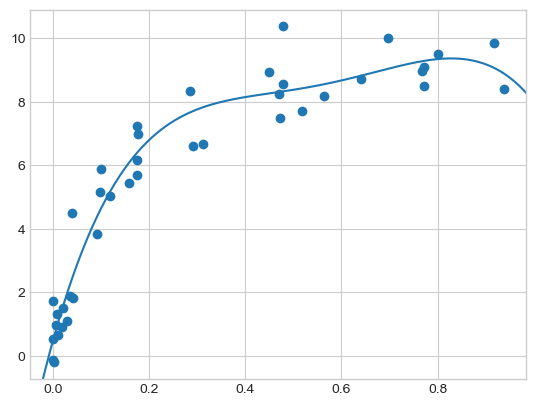

In [52]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Feature Engineering. Categorical Features

In [1]:
data = [
    {'price': 850_000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700_000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650_000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600_000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [2]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

In [3]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse = False, dtype = int)

vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [4]:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [5]:
vec = DictVectorizer(sparse = True, dtype = int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

### Text Features

In [6]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
import pandas as pd
pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [9]:
# Term frequency–inverse document frequency (TF–IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Derived Features

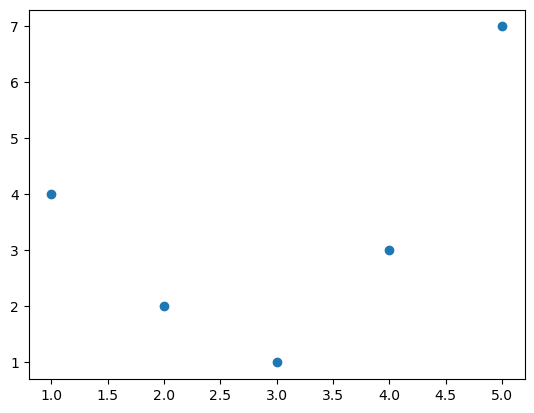

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

plt.scatter(x, y);

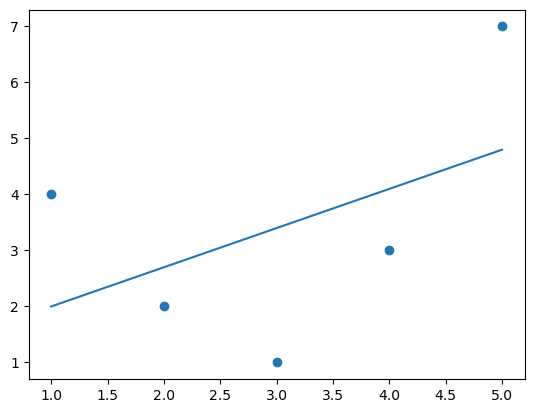

In [11]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]

model = LinearRegression().fit(X, y)

yfit = model.predict(X)

plt.scatter(x, y)
plt.plot(x, yfit);

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, include_bias = False)

X2 = poly.fit_transform(X)

print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


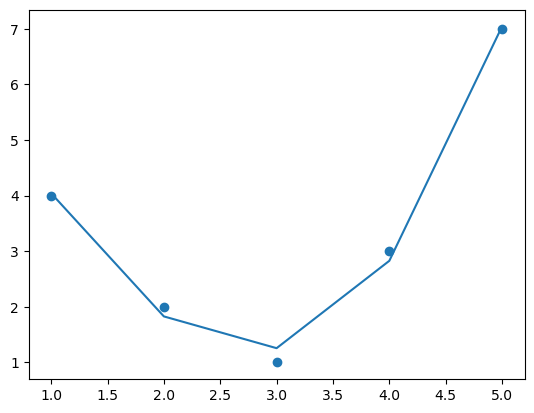

In [13]:
model = LinearRegression().fit(X2, y)

yfit = model.predict(X2)

plt.scatter(x, y)
plt.plot(x, yfit);

### Imputation of Missing Data

In [15]:
from numpy import nan

X = np.array([[nan, 0,   3],
              [3,   7 ,  9],
              [3,   5,   2],
              [4,   nan, 6],
              [8,   8,   1]])

y = np.array([14, 16, -1, 8, -5])

In [16]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'mean')

X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [17]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### Feature Pipelines

In [19]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy = 'mean'),
                      PolynomialFeatures(degree = 2),
                      LinearRegression())

In [20]:
model.fit(X, y)   # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


### In Depth: Naive Bayes Classification. Bayesian Classification

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

### Gaussian Naive Bayes

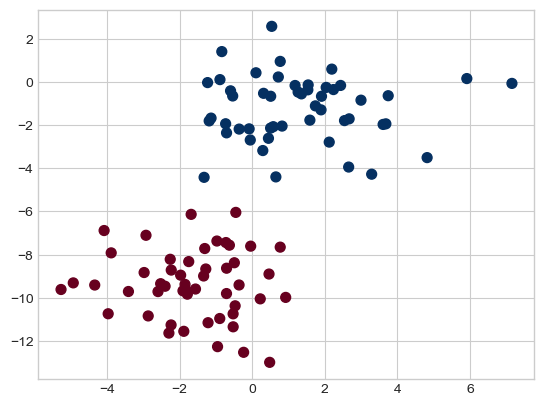

In [27]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers = 2, random_state = 2, cluster_std = 1.5)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu');

In [36]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X, y);

In [39]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

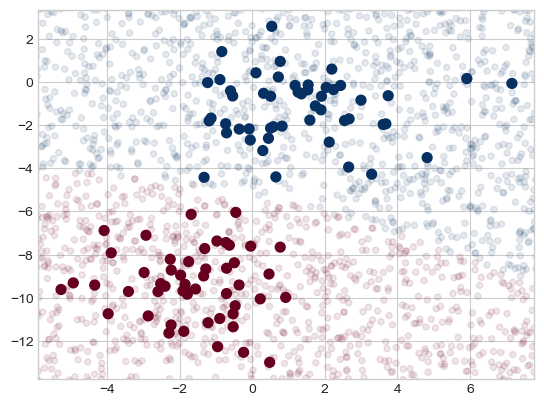

In [40]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], 
            c = ynew, s = 20, cmap = 'RdBu', alpha = 0.1)
plt.axis(lim);

In [41]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Multinomial Naive Bayes. Example: Classifying Text

In [42]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

In [49]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

In [50]:
print(train.data[5][48:])

Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [52]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

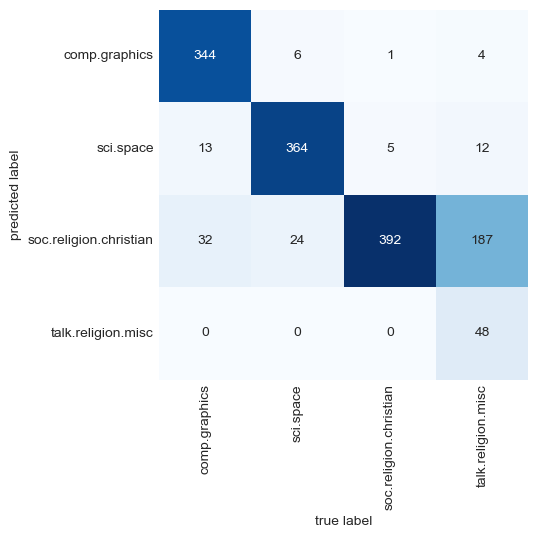

In [54]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)

sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = train.target_names, yticklabels = train.target_names,
            cmap = 'Blues')

plt.xlabel('true label')
plt.ylabel('predicted label');

In [55]:
def predict_category(s, train = train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [56]:
predict_category('sending a payload to the ISS')

'sci.space'

In [57]:
predict_category('discussing the existence of God')

'soc.religion.christian'

In [58]:
predict_category('determining the screen resolution')

'comp.graphics'

### In Depth: Linear Regression

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

### Simple Linear Regression

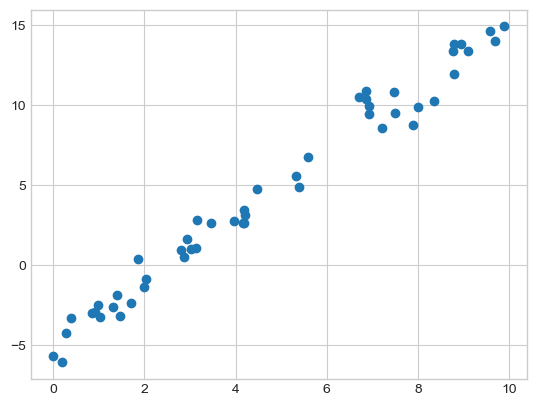

In [61]:
# y = ax + b

rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

plt.scatter(x, y);

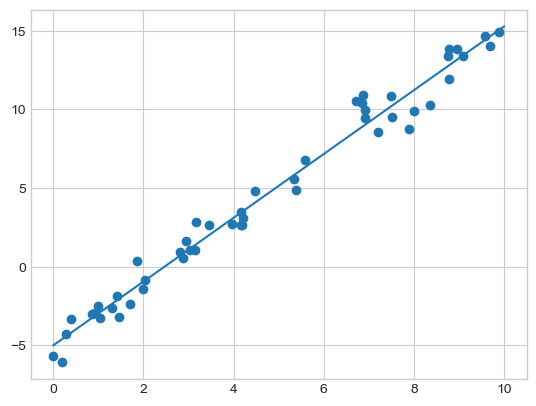

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);